### Import dataset user sentiment 

In [1]:
# Import necessary libraries to handle data 
import pandas as pd 

# read in sentiment analysis training dataset
sentiment_data = pd.read_csv('archive/MovieReviewTrainingDatabase.csv')

# Show first five rows of the data set
sentiment_data.head()

,sentiment,review
0,Positive,With all this stuff going down at the moment w...
1,Positive,'The Classic War of the Worlds' by Timothy Hin...
2,Negative,The film starts with a manager (Nicholas Bell)...
3,Negative,It must be assumed that those who praised this...
4,Positive,Superbly trashy and wondrously unpretentious 8...


### Convert Sentiment Labels into numerical labels for Logistic model training 

In [2]:
# Import necessary libraries from sklearn to covert label
from sklearn.preprocessing import LabelEncoder

# Instance the label encoder 
lab_encoder = LabelEncoder()

# Fit and transform the sentiment 'sentiment' column to numerical value
sentiment_data['sentiment'] = lab_encoder.fit_transform(sentiment_data['sentiment'])

# Show first five row of data frame with encoded labels 
sentiment_data.head()

,sentiment,review
0,1,With all this stuff going down at the moment w...
1,1,'The Classic War of the Worlds' by Timothy Hin...
2,0,The film starts with a manager (Nicholas Bell)...
3,0,It must be assumed that those who praised this...
4,1,Superbly trashy and wondrously unpretentious 8...


### Feature generation using TfidfVectorizer 

In [3]:
# Generat the TF-IDF matrix using NTLK sklearn
# Import TfidfVectorizer and RegexTokenizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a Regex tokenizer for removing special symbols and numeric values
regex_tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

# Initialize TfidfVectorizer object
tfidf = TfidfVectorizer(lowercase=True, 
                        stop_words ='english',
                        ngram_range = (1,1),
                        tokenizer = regex_tokenizer.tokenize,
                        token_pattern=None)

# Fit and transform the dataset 
text_tfidf = tfidf.fit_transform(sentiment_data['review'])

### Splitting the data

In [4]:
# Import from sklearn the split_train object to split the train and test data set 70/30
from sklearn.model_selection import train_test_split

# Partion the data into a 70/30 train test split 
feature_train, feature_test, target_train, target_test = train_test_split(text_tfidf, sentiment_data['sentiment'], test_size=0.3, random_state=1)

### Creation of the Logistic Regression Model for User Sentiment 

In [5]:
# Import model using sklearn
from sklearn.linear_model import LogisticRegression

# Iniate logistic regression object using solver 'sag' because it is suitable for large datasets 
tfidf_logreg = LogisticRegression(solver='sag')

# fit the model with the train data sets 
tfidf_logreg.fit(feature_train, target_train)

# Predict the target variable using the test dataset 
tfidf_predictions = tfidf_logreg.predict(feature_test)

#### Get and print the intercept and coefficients

In [6]:
# Print the intercept
intercept = tfidf_logreg.intercept_
print("Intercept:", intercept)

# Print the coefficients
coefficients = tfidf_logreg.coef_.ravel()
print("Coefficients:", coefficients)

Intercept: [0.03017704]
Coefficients: [-0.12487652 -0.09814385  0.         ... -0.00847308 -0.00847308
 -0.00847308]


### Review Model performance metrics to use 

In [7]:
# import metrics module from performace evaluation 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Access the model by printing the accuracy score 
print("Logistic Regression Model Accuracy Score:", accuracy_score(target_test, tfidf_predictions))

# Calculate the model precision
print("Logistic Regression Model Precision:", precision_score(target_test,tfidf_predictions))

# Calcualte the models recall 
print("Logistic Regression Model Recall Score:", recall_score(target_test, tfidf_predictions))

# Calculate the modles F1- Score 
print("Logistic Regression Model F-1 ScoreP:", f1_score(target_test, tfidf_predictions))

Logistic Regression Model Accuracy Score: 0.8912
Logistic Regression Model Precision: 0.8804718217562254
Logistic Regression Model Recall Score: 0.9031997848884109
Logistic Regression Model F-1 ScoreP: 0.8916910007963897


### Preform logistical regression on Movie MetaData dataset 

In [8]:
# read in the dataset 
movie_metadata = pd.read_csv('clean_movie_metadata_reviews.csv')

# Show the first 5 row of the DataFrame 
movie_metadata.head()

,name,movie_rated,run_length,Combined Genre,release_date,IMDB_rating,reviewer_rating,review_date,review,release_country
0,The Dark Knight,PG-13,2h 32min,Action,2008-07-18,9.0,10,2020-02-12,"Confidently directed, dark, brooding, and pack...",USA
1,The Dark Knight,PG-13,2h 32min,Action,2008-07-18,9.0,10,2008-07-20,I got to see The Dark Knight on Wednesday nigh...,USA
2,The Dark Knight,PG-13,2h 32min,Action,2008-07-18,9.0,10,2008-07-09,We've been subjected to enormous amounts of hy...,USA
3,The Dark Knight,PG-13,2h 32min,Action,2008-07-18,9.0,9,2018-10-12,First I'd controversially like to point out th...,USA
4,The Dark Knight,PG-13,2h 32min,Action,2008-07-18,9.0,10,2008-07-20,"I couldn't believe ""The Dark knight"" could liv...",USA


#### Preprocess Data for the logistical regression model 

In [9]:
# create a list of just the review for 
metadata_reviews = movie_metadata['review']

# Show the top 5 records 
metadata_reviews.head()

0    Confidently directed, dark, brooding, and pack...
1    I got to see The Dark Knight on Wednesday nigh...
2    We've been subjected to enormous amounts of hy...
3    First I'd controversially like to point out th...
4    I couldn't believe "The Dark knight" could liv...
Name: review, dtype: object

#### Feature generation on user reviews of movie metadata  data frame using already created TfidfVectorizer 

In [10]:
# Transform the metadata reviews using the fitted TfidfVectorizer
meta_text_tfidf = tfidf.transform(metadata_reviews)

### Use Logression Model to predict values of sentiment (1 for positive, 0 for negative), append to the dataframe

In [11]:
# Predict the sentiments for the entire metadata reviews dataset
tfidf_metadata = tfidf_logreg.predict(meta_text_tfidf)

# Add predictions to the movie metadata dataframe
movie_metadata['sentiment'] = pd.Series(tfidf_metadata, index=movie_metadata.index)

#### Export results to CSV if needed for future exploration and read in CSV for data manipulation/exploration

In [12]:
# Export to CSV
movie_metadata.to_csv('clean_movie_metadata_sentiment.csv', index=False)

# # Read in the dataset exported after predictions 
movie_sentiment = pd.read_csv('clean_movie_metadata_sentiment.csv')

# Validate the export and import worked
movie_sentiment.head()

,name,movie_rated,run_length,Combined Genre,release_date,IMDB_rating,reviewer_rating,review_date,review,release_country,sentiment
0,The Dark Knight,PG-13,2h 32min,Action,2008-07-18,9.0,10,2020-02-12,"Confidently directed, dark, brooding, and pack...",USA,1
1,The Dark Knight,PG-13,2h 32min,Action,2008-07-18,9.0,10,2008-07-20,I got to see The Dark Knight on Wednesday nigh...,USA,1
2,The Dark Knight,PG-13,2h 32min,Action,2008-07-18,9.0,10,2008-07-09,We've been subjected to enormous amounts of hy...,USA,1
3,The Dark Knight,PG-13,2h 32min,Action,2008-07-18,9.0,9,2018-10-12,First I'd controversially like to point out th...,USA,1
4,The Dark Knight,PG-13,2h 32min,Action,2008-07-18,9.0,10,2008-07-20,"I couldn't believe ""The Dark knight"" could liv...",USA,1


In [13]:
movie_sentiment.tail()

,name,movie_rated,run_length,Combined Genre,release_date,IMDB_rating,reviewer_rating,review_date,review,release_country,sentiment
1259467,The Alamo,PG-13,2h 17min,War,2004-04-09,6.0,8,2011-06-24,I thought this was a very well-made movie. The...,USA,1
1259468,The Alamo,PG-13,2h 17min,War,2004-04-09,6.0,6,2005-01-01,"At this moment in American history, with the g...",USA,0
1259469,The Alamo,PG-13,2h 17min,War,2004-04-09,6.0,3,2004-12-29,The 2004 version of John Lee Hancock's Alamo m...,USA,1
1259470,The Alamo,PG-13,2h 17min,War,2004-04-09,6.0,7,2004-11-09,"his coughing was a little over the top, too. i...",USA,0
1259471,The Alamo,PG-13,2h 17min,War,2004-04-09,6.0,6,2004-10-08,I understand that Russel Crowe was originally ...,USA,0


### Exploratory Analysis For Recommendations on Movie Qualities Based on User Sentiment 

In [14]:
# Show the data frame contents using pandas info
movie_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259472 entries, 0 to 1259471
Data columns (total 11 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   name             1259472 non-null  object 
 1   movie_rated      1259472 non-null  object 
 2   run_length       1259472 non-null  object 
 3   Combined Genre   1259472 non-null  object 
 4   release_date     1259472 non-null  object 
 5   IMDB_rating      1259472 non-null  float64
 6   reviewer_rating  1259472 non-null  int64  
 7   review_date      1259472 non-null  object 
 8   review           1259472 non-null  object 
 9   release_country  1259472 non-null  object 
 10  sentiment        1259472 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 105.7+ MB


In [15]:
# preform statistics using describe to see the spread of numerical data points 
movie_sentiment.describe()

,IMDB_rating,reviewer_rating,sentiment
count,1.259472e+06,1.259472e+06,1.259472e+06
mean,7.669522e+00,7.311607e+00,7.098546e-01
std,7.475040e-01,2.841514e+00,4.538295e-01
min,3.500000e+00,1.000000e+00,0.000000e+00
25%,7.200000e+00,6.000000e+00,0.000000e+00
50%,7.700000e+00,8.000000e+00,1.000000e+00
75%,8.200000e+00,1.000000e+01,1.000000e+00
max,9.300000e+00,1.000000e+01,1.000000e+00


In [16]:
# Count the total number of positive and negative reviews 
total_pos_sentiment = movie_sentiment['sentiment'].value_counts()[1]
total_neg_sentiment =  movie_sentiment['sentiment'].value_counts()[0]

# Display the number of reviews
print("Total Positive Reviews:", total_pos_sentiment)
print("Total Negative Reviews:", total_neg_sentiment)

Total Positive Reviews: 894042
Total Negative Reviews: 365430


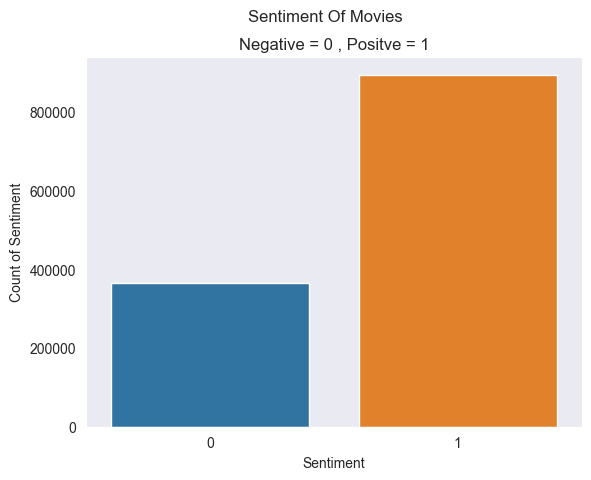

In [17]:
# Import necessary libraries for data visualization 
import seaborn as sns
import matplotlib.pyplot as plt

# Set the Seaborn style for the notebook
sns.set_style("dark")

# Create a count plot to show the sentiment  
sns.countplot(x='sentiment', data=movie_sentiment)

# Update title x label, y label, title, and sub title 
plt.xlabel("Sentiment")
plt.ylabel("Count of Sentiment")
plt.suptitle("Sentiment Of Movies")
plt.title("Negative = 0 , Positve = 1")

#Show the plot 
plt.show()

### User Sentiment by Genre Analysis 

In [18]:
# Group the data by genre and calculate the average reviewer rating, sentiment, and IMDB rating for each genre
avg_by_genre = movie_sentiment.groupby('Combined Genre').agg({'reviewer_rating': 'mean', 'IMDB_rating': 'mean', 'sentiment': 'mean'}).reset_index()

print(avg_by_genre)

   Combined Genre  reviewer_rating  IMDB_rating  sentiment
0          Action         7.327085     7.808646   0.702755
1       Adventure         7.323152     7.793976   0.712187
2       Animation         7.640772     7.647241   0.795244
3       Biography         7.708867     7.770350   0.804482
4          Comedy         7.429103     7.719253   0.749450
5           Crime         7.695986     8.070706   0.741568
6           Drama         7.860363     8.337773   0.767338
7         Fantasy         7.036015     7.196794   0.679049
8         History         7.270883     7.480034   0.744325
9          Horror         6.415335     7.043325   0.537829
10          Music         7.420418     7.309879   0.779968
11        Mystery         6.811279     7.431934   0.623937
12        Romance         7.374147     7.451664   0.756408
13         Sci-Fi         6.990514     7.500349   0.646337
14          Sport         7.325047     7.102649   0.766155
15       Thriller         7.287833     7.692453   0.6954

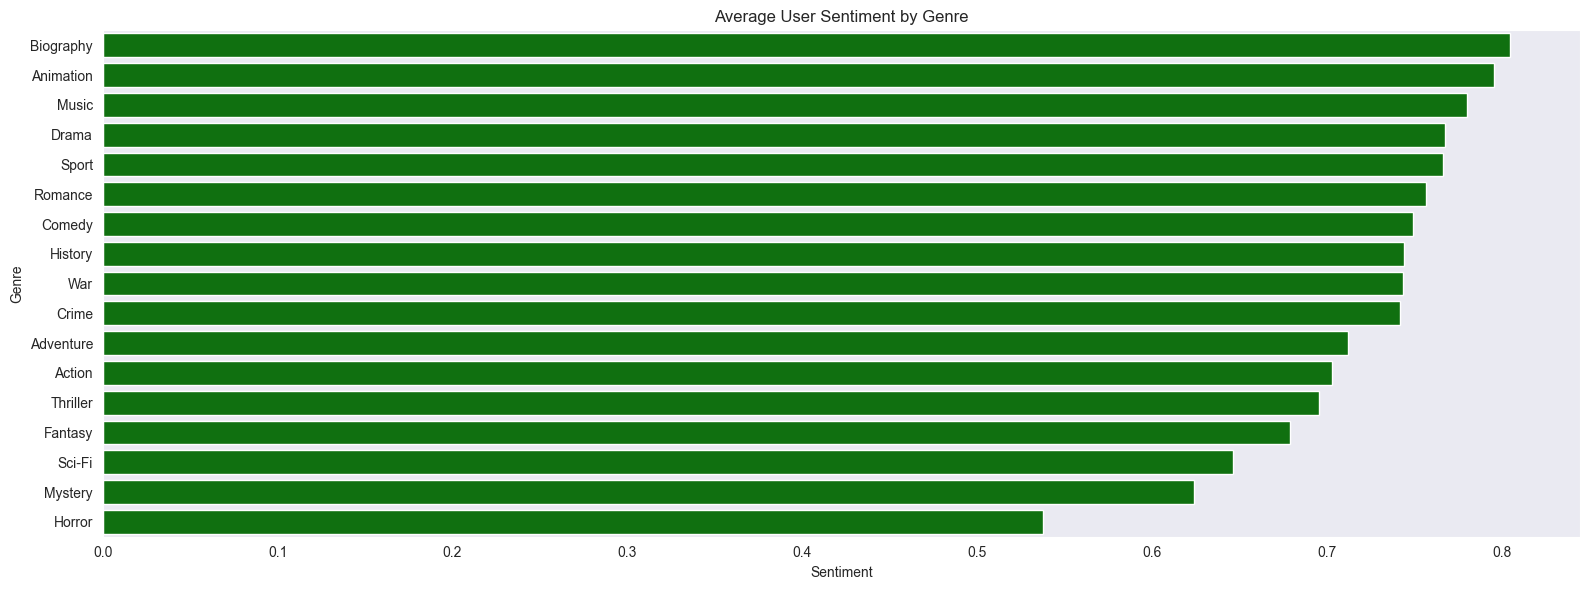

In [19]:
# Show user sentiment in a bar chart by genre 
#Create the figure
plt.figure(figsize=(16, 6))

# Sort genres by sentiment in descending order
ordered_genres = avg_by_genre.sort_values('sentiment', ascending=False)['Combined Genre']

# Use sns.barplot for horizontal bars
sns.barplot(x='sentiment', y='Combined Genre', data=avg_by_genre, color='green', order=ordered_genres)

# Set up the axis
plt.xlabel('Sentiment')
plt.ylabel('Genre') 
plt.title('Average User Sentiment by Genre')

# Show the plot
plt.tight_layout()
plt.show()

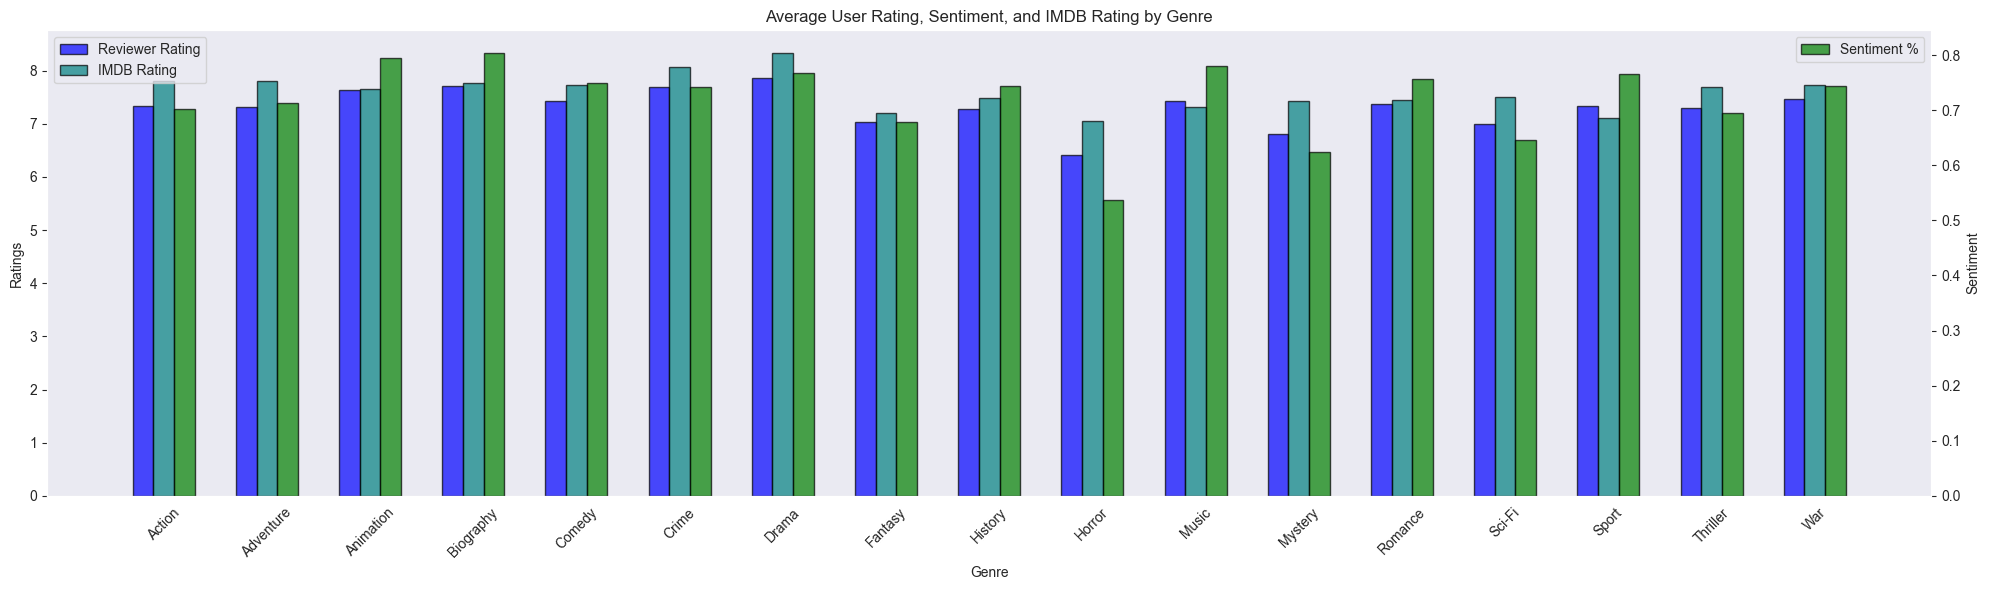

In [20]:
# Show user sentiment, user review and IMDB rating in a bar chart by genre 
# Create the figure and first axis
fig, ax1 = plt.subplots(figsize=(20, 6))

# Define the bar width and spacing
bar_width = 0.2
spacing = 0.4  # Increase spacing for clarity
x = range(len(avg_by_genre['Combined Genre']))

# Plot reviewer and IMDB ratings on the first y-axis
bar1 = [p - bar_width for p in x]
bar2 = x
bar3 = [p + bar_width for p in x]

ax1.bar(bar1, avg_by_genre['reviewer_rating'], width=bar_width, label='Reviewer Rating', color='blue', alpha=0.7,  edgecolor='black', align='center')
ax1.bar(bar2, avg_by_genre['IMDB_rating'], width=bar_width, label='IMDB Rating', color='teal', alpha=0.7, edgecolor='black', align='center')

# Set up the first axis
ax1.set_xlabel('Genre')
ax1.set_ylabel('Ratings')
ax1.set_title('Average User Rating, Sentiment, and IMDB Rating by Genre')
ax1.set_xticks(bar2)  # Set x-ticks to the position of the middle bar
ax1.set_xticklabels(avg_by_genre['Combined Genre'], rotation=45)
ax1.legend(loc='upper left')

# Create the second y-axis for sentiment
ax2 = ax1.twinx()
ax2.bar(bar3, avg_by_genre['sentiment'], width=bar_width, label='Sentiment %', color='green', alpha=0.7, edgecolor='black', align='center')

# Set up the second axis
ax2.set_ylabel('Sentiment')
ax2.legend(loc='upper right')

# Adjust the x-tick labels to be centered under the middle set of bars
ax1.set_xticks([p for p in bar2])
ax1.set_xticklabels(avg_by_genre['Combined Genre'], rotation=45, ha='center')

# Show the plot and get rid of unwanted space 
plt.tight_layout()
plt.show()

### User Sentiment by Country Analysis 

In [21]:
# Group the data by country and calculate the average reviewer rating, sentiment, and IMDB rating for each genre
avg_by_country = movie_metadata.groupby('release_country').agg({'reviewer_rating': 'mean', 'IMDB_rating': 'mean', 'sentiment': 'mean'}).reset_index()

print(avg_by_country)

   release_country  reviewer_rating  IMDB_rating  sentiment
0        Australia         8.528846     8.100000   0.908654
1           Brazil         8.412678     8.013713   0.883571
2           Canada         7.633205     7.157915   0.853282
3            China         8.165698     7.820930   0.883721
4           France         7.971349     7.985694   0.754932
5          Germany         7.651639     7.276639   0.790984
6          Hungary         8.338488     8.108935   0.805842
7            India         8.240202     8.157244   0.838181
8          Ireland         5.636476     7.361538   0.569479
9            Italy         8.511111     8.100000   0.911111
10           Japan         8.678223     8.184832   0.889491
11      Kazakhstan         8.428016     7.500000   0.770428
12        Malaysia         6.555556     6.500000   0.841270
13          Mexico         9.169565     8.000000   0.973913
14     Netherlands         6.837209     6.687209   0.545220
15          Poland         7.357143     

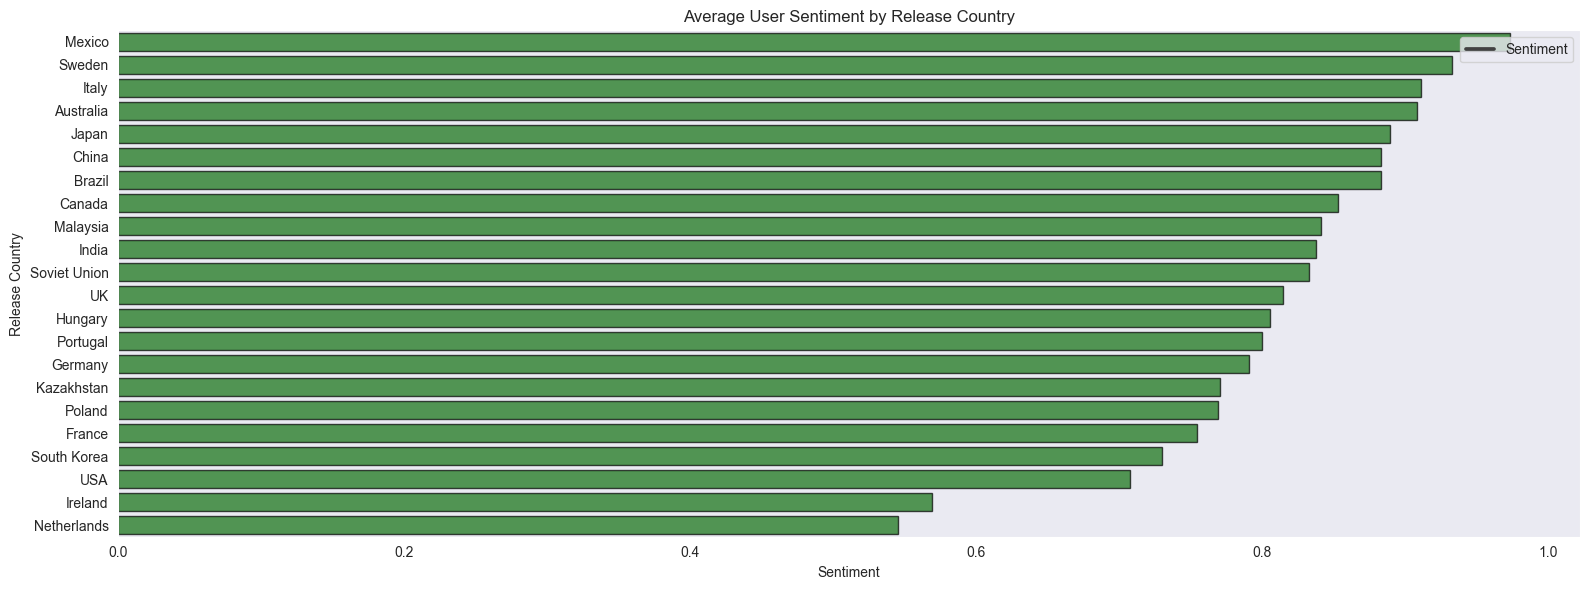

In [22]:
# Show user sentiment in a bar chart by country 
# Create the figure and  axis
fig, ax1 = plt.subplots(figsize=(16, 6))

# Sort genres by sentiment in descending order
ordered_countries = avg_by_country.sort_values('sentiment', ascending=False)['release_country']

# Use barh for horizontal bars
sns.barplot(x='sentiment', y= 'release_country', data = avg_by_country, alpha=0.7, edgecolor='black', color='green',order= ordered_countries)

# Set up the axis
ax1.set_xlabel('Sentiment')
ax1.set_ylabel('Release Country') 
ax1.set_title('Average User Sentiment by Release Country')
ax1.legend(['Sentiment'], loc='upper right')

# Show the plot and get rid of unwanted space
plt.tight_layout()
plt.show()

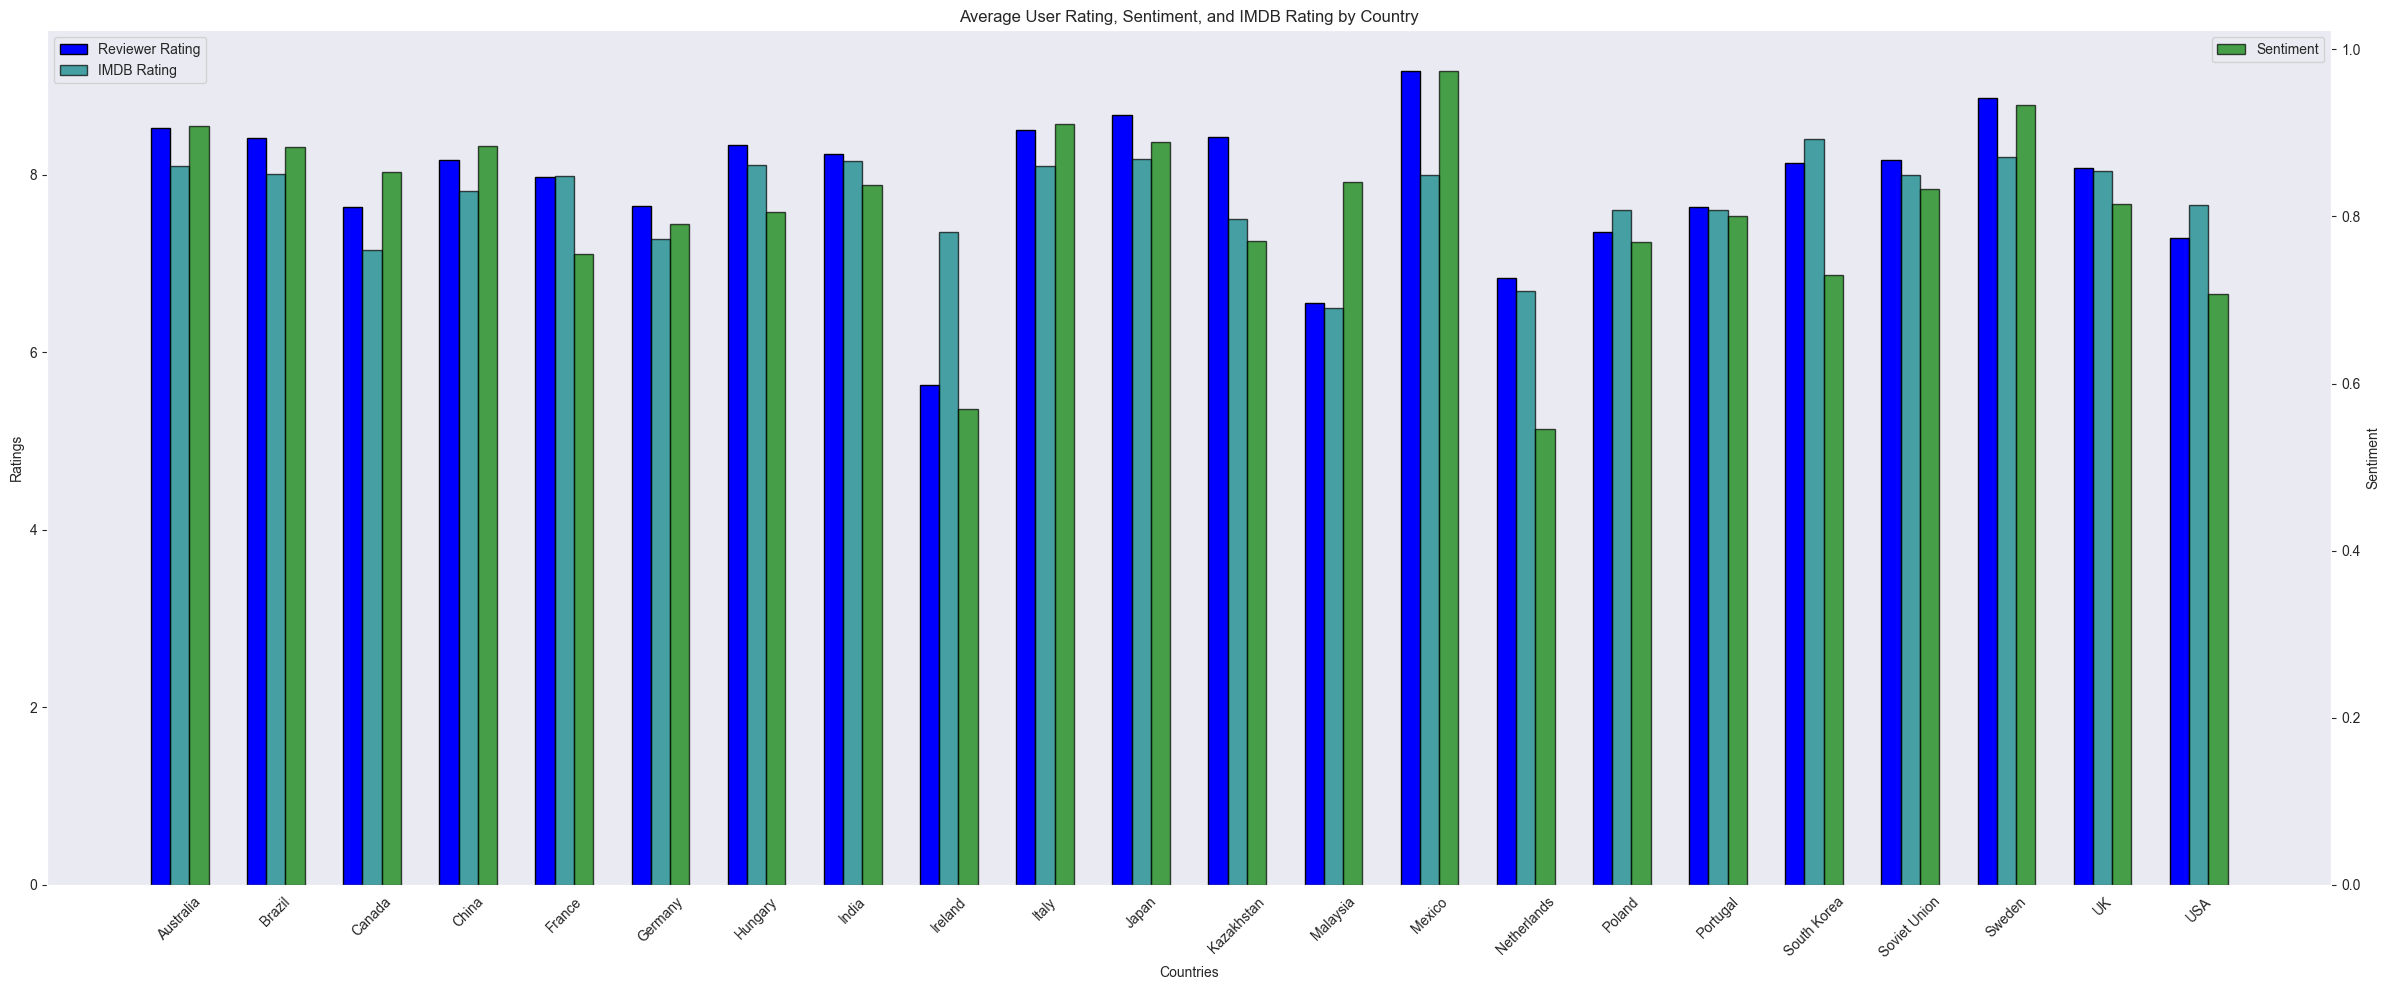

In [23]:
# Show user sentiment, user and IMDB rating in a bar chart by country 
# Create the figure and first axis
fig, ax1 = plt.subplots(figsize=(24, 10))

# Define the bar width and spacing
bar_width = 0.2
spacing = 0.4  # Increase spacing for clarity
x = range(len(avg_by_country['release_country']))

# Plot reviewer and IMDB ratings on the first y-axis
bar1 = [p - bar_width for p in x]
bar2 = x
bar3 = [p + bar_width for p in x]

ax1.bar(bar1, avg_by_country['reviewer_rating'], width=bar_width, label='Reviewer Rating', color='blue', edgecolor='black', align='center')
ax1.bar(bar2, avg_by_country['IMDB_rating'], width=bar_width, label='IMDB Rating', color='teal', alpha=0.7, edgecolor='black', align='center')

# Set up the first axis
ax1.set_xlabel('Countries')
ax1.set_ylabel('Ratings')
ax1.set_title('Average User Rating, Sentiment, and IMDB Rating by Country')
ax1.set_xticks(bar2)  # Set x-ticks to the position of the middle bar
ax1.set_xticklabels(avg_by_country['release_country'], rotation=45)
ax1.legend(loc='upper left')

# Create the second y-axis for sentiment
ax2 = ax1.twinx()
ax2.bar(bar3, avg_by_country['sentiment'], width=bar_width, label='Sentiment', color='green', alpha=0.7, edgecolor='black', align='center')

# Set up the second axis
ax2.set_ylabel('Sentiment')
ax2.legend(loc='upper right')

# Adjust the x-tick labels to be centered under the middle set of bars
ax1.set_xticks([p for p in bar2])
ax1.set_xticklabels(avg_by_country['release_country'], rotation=45, ha='center')

# Show the plot
plt.tight_layout()
plt.show()

### User Sentiment by Top and Bottom Titles Analysis 

In [24]:
# Group the data by name and calculate the average reviewer rating, sentiment, and IMDB rating for each genre
avg_by_title = movie_sentiment.groupby('name').agg({'reviewer_rating': 'mean', 'IMDB_rating': 'mean', 'sentiment': 'mean'}).reset_index()

print(avg_by_title)

                            name  reviewer_rating  IMDB_rating  sentiment
0            10 Cloverfield Lane         6.711538          7.2   0.635989
1     10 Things I Hate About You         8.214286          7.3   0.842437
2                   12 Angry Men         9.161313          8.9   0.884368
3                     12 Monkeys         8.122449          8.0   0.884972
4                      12 Strong         5.740845          6.6   0.594366
...                          ...              ...          ...        ...
1034            Zero Dark Thirty         6.198529          7.4   0.561765
1035                      Zodiac         7.417120          7.7   0.777174
1036                  Zombieland         7.156951          7.6   0.699552
1037                    Zootopia         8.353204          8.0   0.895678
1038                        Zulu         8.555000          7.7   0.870000

[1039 rows x 4 columns]


In [25]:
# Sort by reviewer_rating in descending order and reset the index
top_20_sentiment = avg_by_title.sort_values('sentiment', ascending=False).reset_index(drop=True)

# Get the top 20
top_20_sentiment = top_20_sentiment.head(20)

print(top_20_sentiment)

                              name  reviewer_rating  IMDB_rating  sentiment
0      The Best Years of Our Lives         9.169565          8.0   0.973913
1               Back to the Future         9.262346          8.5   0.968107
2                        Toy Story         9.040777          8.3   0.965049
3   All Quiet on the Western Front         8.793814          8.0   0.963918
4                       Departures         8.314286          8.1   0.957143
5                 The Elephant Man         8.976676          8.1   0.956268
6        In the Name of the Father         8.543624          8.1   0.953020
7                Castle in the Sky         8.941748          8.0   0.951456
8              Singin' in the Rain         8.822464          8.3   0.951087
9                           Gandhi         8.516529          8.0   0.950413
10      The Passion of Joan of Arc         8.993506          8.1   0.948052
11                           Glory         8.905028          7.8   0.946927
12          

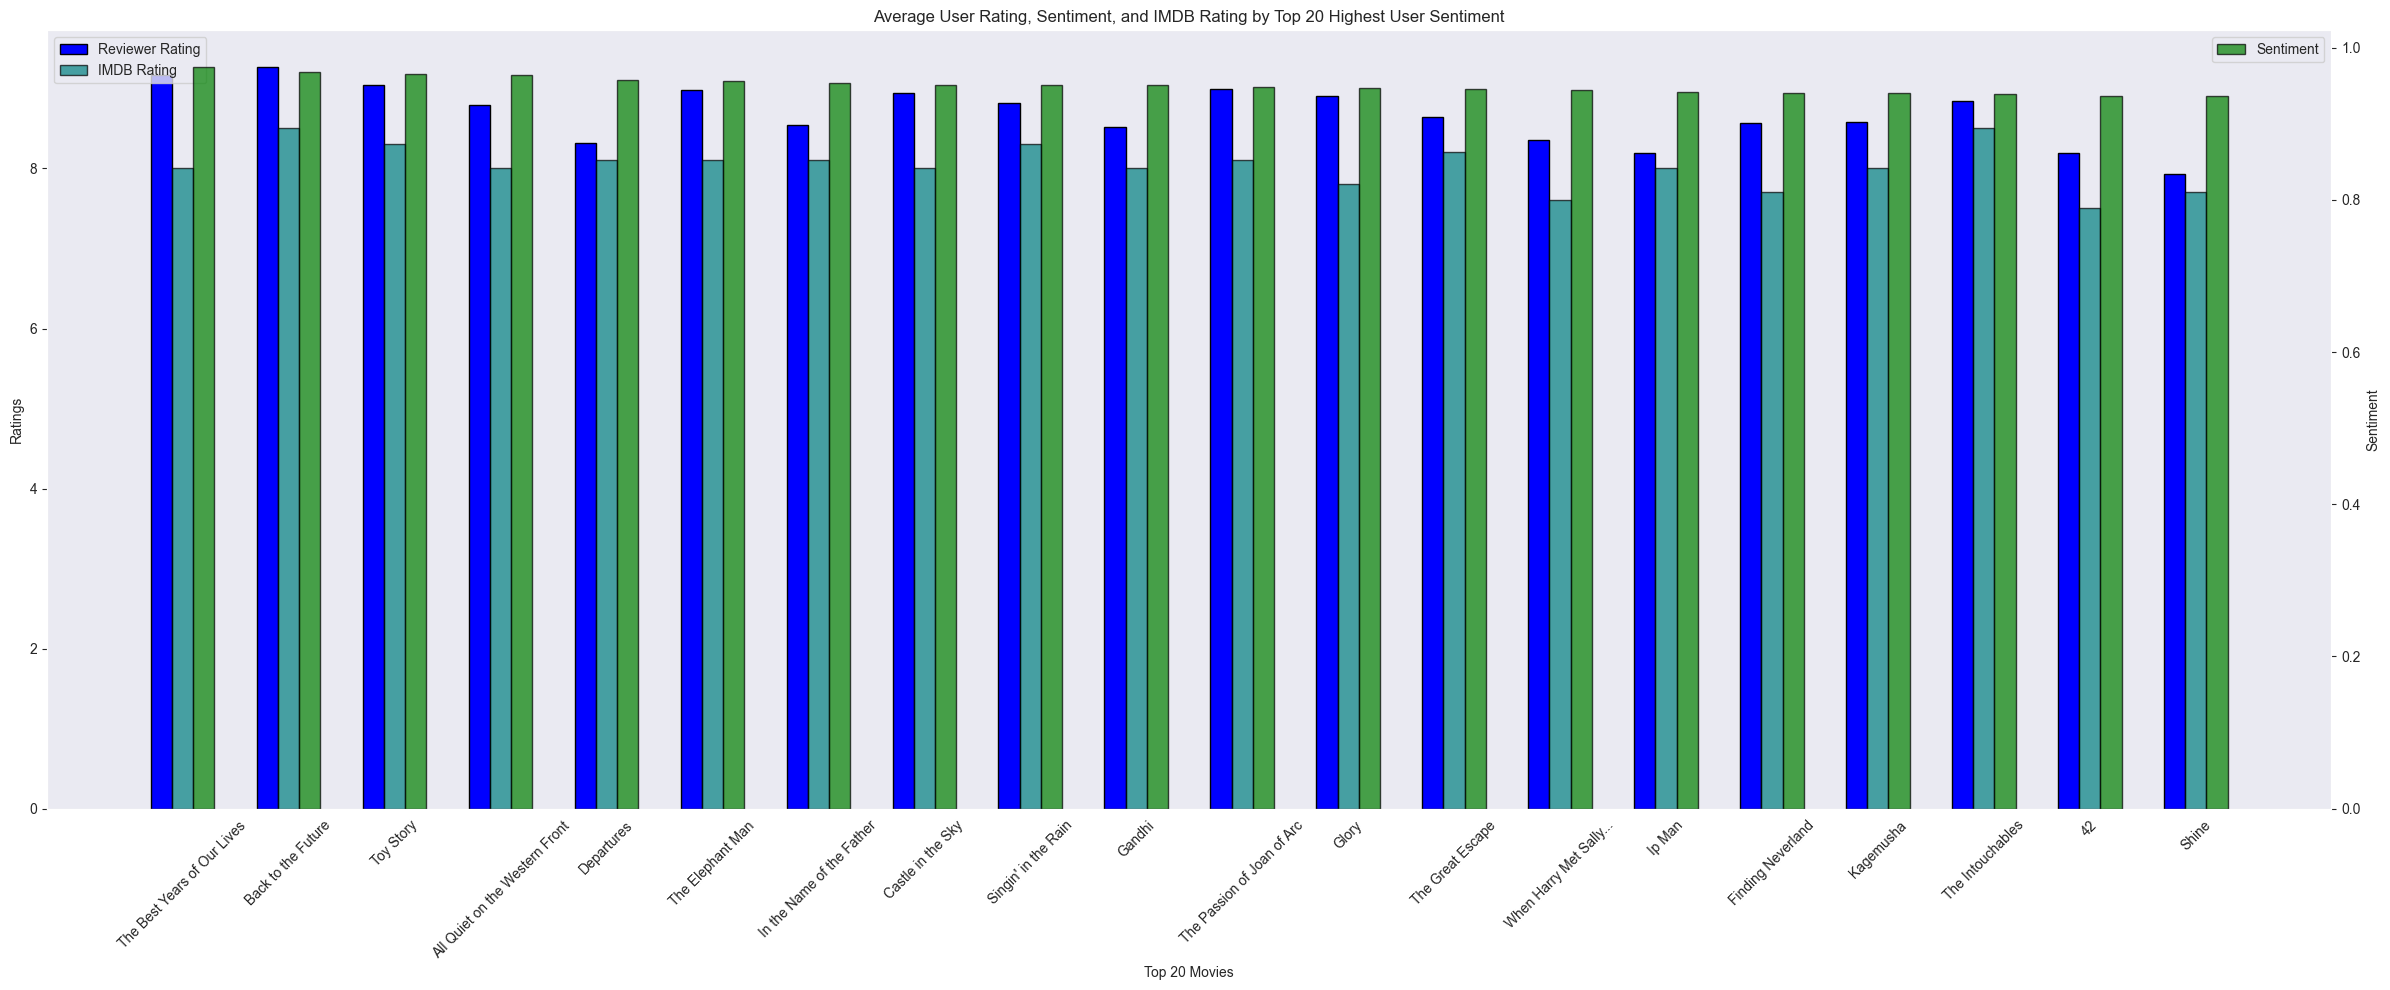

In [26]:
# Show user sentiment, user rating, and IMDB rating  in a bar chart by Top 20 positive user sentiment 
# Create the figure and first axis
fig, ax1 = plt.subplots(figsize=(24, 10))

# Define the bar width and spacing
bar_width = 0.2
spacing = 0.4  # Increase spacing for clarity
x = range(len(top_20_sentiment['name']))

# Plot reviewer and IMDB ratings on the first y-axis
bar1 = [p - bar_width for p in x]
bar2 = x
bar3 = [p + bar_width for p in x]

ax1.bar(bar1, top_20_sentiment['reviewer_rating'], width=bar_width, label='Reviewer Rating', color='blue', edgecolor='black', align='center')
ax1.bar(bar2, top_20_sentiment['IMDB_rating'], width=bar_width, label='IMDB Rating', color='teal', alpha=0.7, edgecolor='black', align='center')

# Set up the first axis
ax1.set_xlabel('Top 20 Movies')
ax1.set_ylabel('Ratings')
ax1.set_title('Average User Rating, Sentiment, and IMDB Rating by Top 20 Highest User Sentiment')
ax1.set_xticks(bar2)  # Set x-ticks to the position of the middle bar
ax1.set_xticklabels(top_20_sentiment['name'], rotation=45)
ax1.legend(loc='upper left')

# Create the second y-axis for sentiment
ax2 = ax1.twinx()
ax2.bar(bar3, top_20_sentiment['sentiment'], width=bar_width, label='Sentiment', color='green', alpha=0.7, edgecolor='black', align='center')

# Set up the second axis
ax2.set_ylabel('Sentiment')
ax2.legend(loc='upper right')

# Adjust the x-tick labels to be centered under the middle set of bars
ax1.set_xticks([p for p in bar2])
ax1.set_xticklabels(top_20_sentiment['name'], rotation=45, ha='center')

# Show the plot
plt.tight_layout()
plt.show()

In [27]:
# Sort by reviewer_rating in ascending order and reset the index
bottom_20_sentiment = avg_by_title.sort_values('sentiment', ascending=True).reset_index(drop=True)

# Get the top 20
bottom_20_sentiment = bottom_20_sentiment.head(20)

print(bottom_20_sentiment)

                    name  reviewer_rating  IMDB_rating  sentiment
0          The Happening         4.095382          5.0   0.230129
1                 Hostel         4.774601          5.9   0.263298
2          Scary Movie 2         4.997468          5.3   0.281013
3              The Purge         4.551821          5.7   0.285714
4    Clash of the Titans         4.748837          5.8   0.289922
5                Taken 2         4.870370          6.3   0.304527
6               Godzilla         5.736278          6.4   0.312934
7            Point Break         4.446721          5.3   0.315574
8    Paranormal Activity         5.096639          6.3   0.318487
9   Fifty Shades of Grey         5.092359          4.1   0.324252
10           Bad Teacher         5.236641          5.6   0.324427
11       Men in Black II         5.229122          6.2   0.334047
12             Evil Dead         6.261324          6.5   0.346109
13           Van Helsing         5.337598          6.1   0.346457
14    Alie

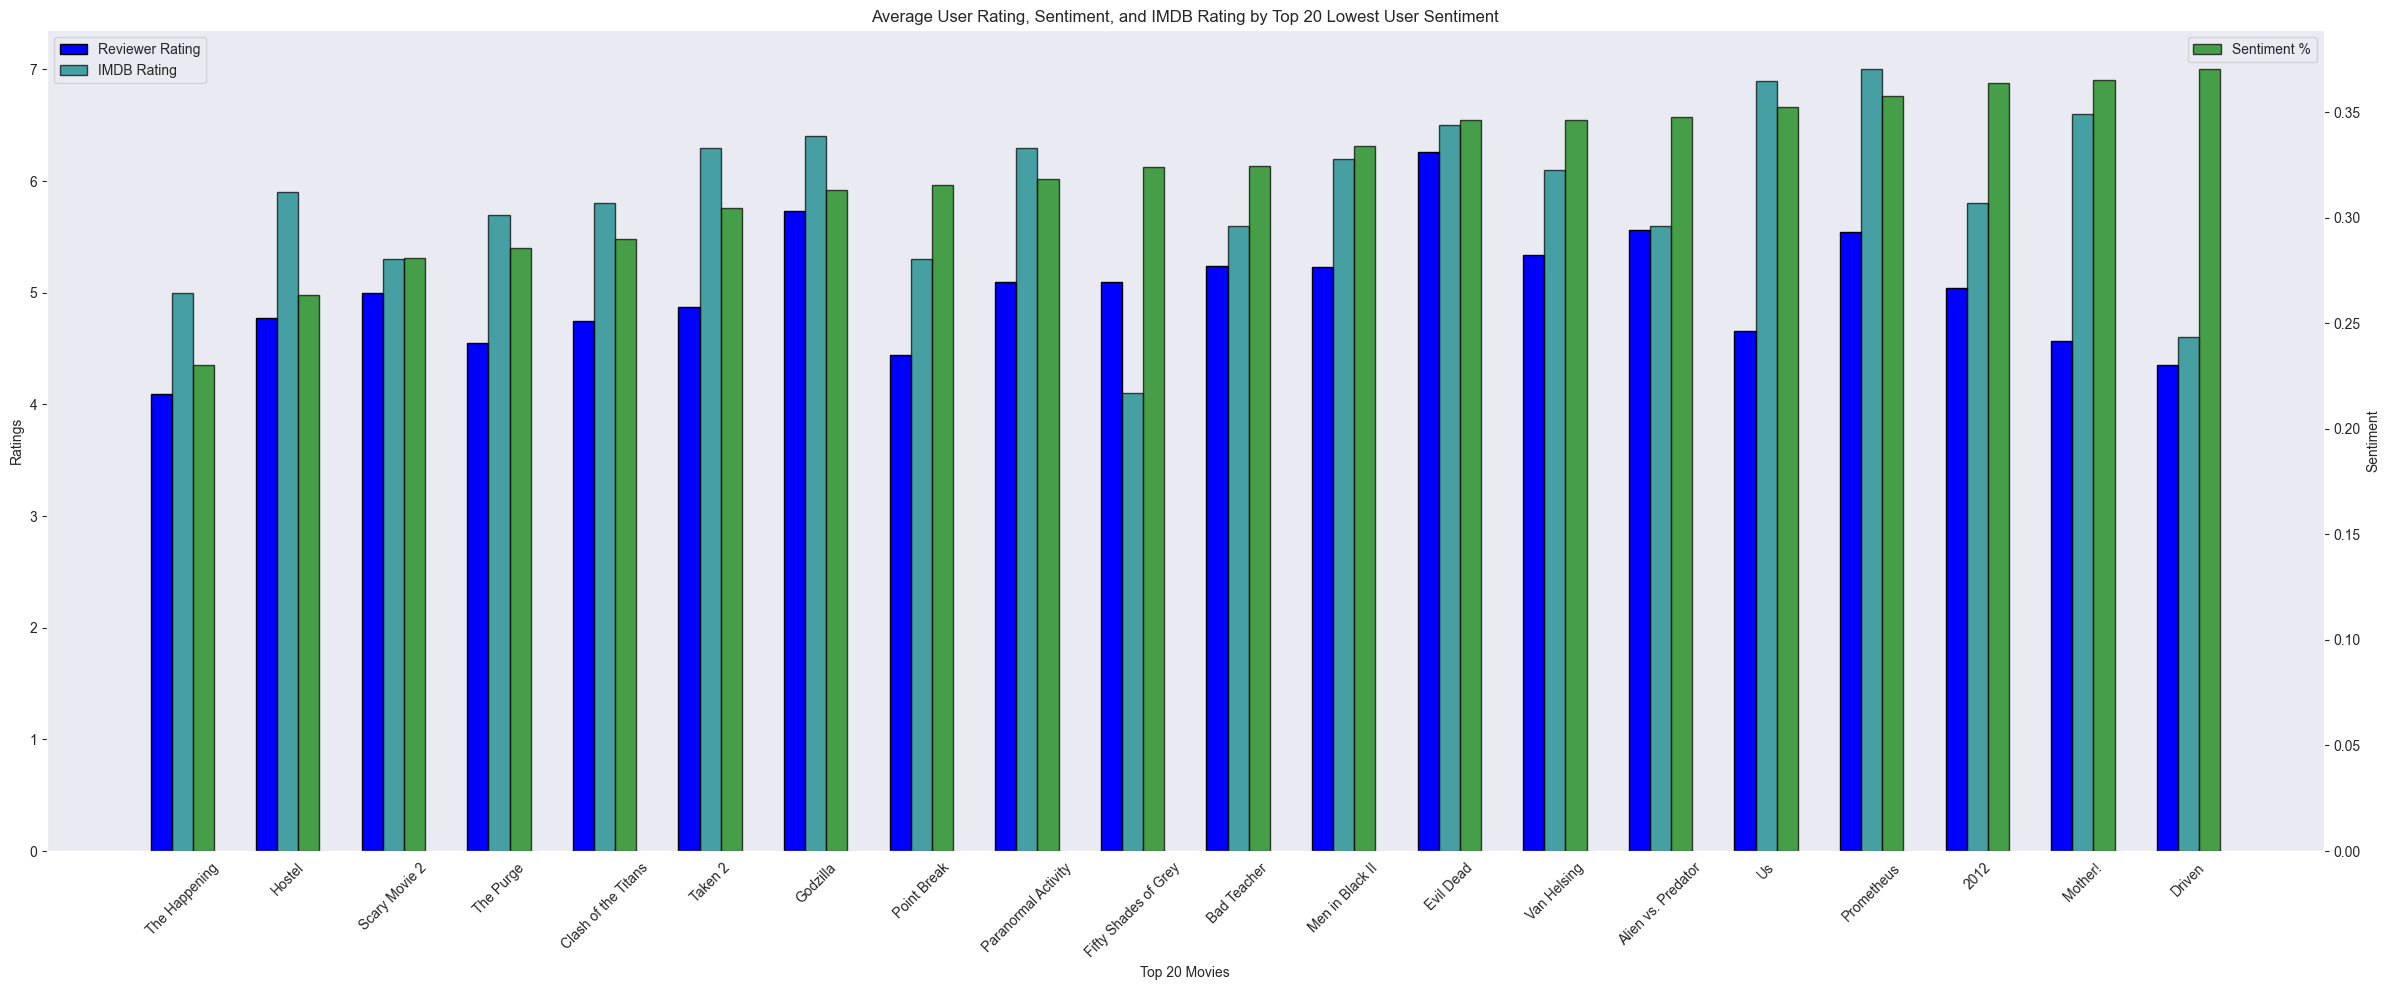

In [28]:
# Show user sentiment, user rating, and IMDB rating  in a bar chart by Top 20 negative user sentiment 
# Create the figure and first axis
fig, ax1 = plt.subplots(figsize=(24, 10))

# Define the bar width and spacing
bar_width = 0.2
spacing = 0.4  # Increase spacing for clarity
x = range(len(bottom_20_sentiment['name']))

# Plot reviewer and IMDB ratings on the first y-axis
bar1 = [p - bar_width for p in x]
bar2 = x
bar3 = [p + bar_width for p in x]

ax1.bar(bar1, bottom_20_sentiment['reviewer_rating'], width=bar_width, label='Reviewer Rating', color='blue', edgecolor='black', align='center')
ax1.bar(bar2, bottom_20_sentiment['IMDB_rating'], width=bar_width, label='IMDB Rating', color='teal', alpha=0.7, edgecolor='black', align='center')

# Set up the first axis
ax1.set_xlabel('Top 20 Movies')
ax1.set_ylabel('Ratings')
ax1.set_title('Average User Rating, Sentiment, and IMDB Rating by Top 20 Lowest User Sentiment')
ax1.set_xticks(bar2)  # Set x-ticks to the position of the middle bar
ax1.set_xticklabels(bottom_20_sentiment['name'], rotation=45)
ax1.legend(loc='upper left')

# Create the second y-axis for sentiment
ax2 = ax1.twinx()
ax2.bar(bar3, bottom_20_sentiment['sentiment'], width=bar_width, label='Sentiment %', color='green', alpha=0.7, edgecolor='black', align='center')

# Set up the second axis
ax2.set_ylabel('Sentiment')
ax2.legend(loc='upper right')

# Adjust the x-tick labels to be centered under the middle set of bars
ax1.set_xticks([p for p in bar2])
ax1.set_xticklabels(bottom_20_sentiment['name'], rotation=45, ha='center')

# Show the plot
plt.tight_layout()
plt.show()

### User Sentiment Over Time by Movie Release and Review Year Analysis 

In [29]:
# Group the data by year and calculate the average reviewer rating, sentiment, and IMDB rating for each genre
movie_sentiment['release_date'] = pd.to_datetime(movie_sentiment['release_date'])

# Extract the year from the datetime column
movie_sentiment['Year'] = movie_sentiment['release_date'].dt.year

# Group the data by year and calculate the average reviewer rating, sentiment, and IMDB rating for each year
avg_by_year = movie_sentiment.groupby('Year').agg({'reviewer_rating': 'mean', 'IMDB_rating': 'mean', 'sentiment': 'mean'}).reset_index()

print(avg_by_year)

    Year  reviewer_rating  IMDB_rating  sentiment
0   1915         6.266667     6.300000   0.707407
1   1925         8.172414     8.000000   0.833333
2   1928         8.993506     8.100000   0.948052
3   1930         8.793814     8.000000   0.963918
4   1933         8.131222     7.800000   0.805430
..   ...              ...          ...        ...
74  2016         6.781188     7.377254   0.650172
75  2017         6.660579     7.509625   0.625089
76  2018         6.659101     7.448544   0.622132
77  2019         7.117954     7.807300   0.652189
78  2020         7.116338     7.988207   0.670693

[79 rows x 4 columns]


In [30]:
# Import nescary libaries to create an interactive plot for the year released and user sentiment, user rating, and IMDB rating 
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.io import output_notebook
from bokeh.models import Range1d, LinearAxis

# Create a ColumnDataSource from the DataFrame
source = ColumnDataSource(avg_by_year)

# Configure Bokeh to output to the notebook
output_notebook()

# Create a new figure object for Release Year plot
p = figure(title="Average User Rating, Sentiment, and IMDB Rating by Movie Release Year",
           x_axis_label="Year", y_axis_label="Average Rating",
           width=800, height=400)

# Add line renderers for user rating and IMDB rating
p.line(x='Year', y='reviewer_rating', line_color="blue", line_width=2, source=source, legend_label="User Rating")
p.line(x='Year', y='IMDB_rating', line_color="teal", line_width=2, source=source, legend_label="IMDB Rating")

# Add line renderer for sentiment on a second y-axis
p.extra_y_ranges = {"Sentiment": Range1d(start=0, end=1)}
p.line(x='Year', y='sentiment', line_color="green", line_width=2, source=source, legend_label="Sentiment", y_range_name="Sentiment")

# Add a hover tool to display values on hover
hover = HoverTool(tooltips=[
    ("Year", "@Year"),
    ("User Rating", "@reviewer_rating"),
    ("IMDB Rating", "@IMDB_rating"),
    ("Sentiment", "@sentiment")])

# Add the hover tool to the plot
p.add_tools(hover)

# Add a second y-axis for sentiment
p.add_layout(LinearAxis(y_range_name="Sentiment", axis_label="Sentiment"), 'right')

# Display the plot
show(p)

Loading BokehJS ...

In [31]:
# Group the data by year and calculate the average reviewer rating, sentiment, and IMDB rating for each genre
movie_sentiment['review_year'] = pd.to_datetime(movie_sentiment['review_date'])

# Extract the year from the datetime column
movie_sentiment['review_year'] = movie_sentiment['review_year'].dt.year

# Group the data by year and calculate the average reviewer rating, sentiment, and IMDB rating for each year
avg_by_ryear = movie_sentiment.groupby('review_year').agg({'reviewer_rating': 'mean', 'IMDB_rating': 'mean', 'sentiment': 'mean'}).reset_index()

print(avg_by_ryear)

    review_year  reviewer_rating  IMDB_rating  sentiment
0          1998         8.244594     7.923419   0.800694
1          1999         7.959898     7.857255   0.754612
2          2000         7.956536     7.880884   0.763982
3          2001         7.778857     7.760510   0.754242
4          2002         7.628718     7.673404   0.735860
5          2003         7.595959     7.691691   0.713362
6          2004         7.573706     7.582533   0.736795
7          2005         7.504288     7.535202   0.732556
8          2006         7.485941     7.594399   0.730936
9          2007         7.120962     7.537656   0.693009
10         2008         7.240666     7.679823   0.704868
11         2009         7.098268     7.591066   0.683822
12         2010         7.164518     7.736868   0.706979
13         2011         7.211216     7.565081   0.722755
14         2012         7.021086     7.543143   0.680780
15         2013         7.053197     7.517946   0.695024
16         2014         7.27894

In [32]:
# Create a ColumnDataSource from the DataFrame
source = ColumnDataSource(avg_by_ryear)

# Configure Bokeh to output to the notebook
output_notebook()

# # Create a new figure object for Review Year plot
p = figure(title="Average User Rating, Sentiment, and IMDB Rating by Review Year",
           x_axis_label="Review Year", y_axis_label="Average Rating",
           width=800, height=400)

# Add line renderers for user rating and IMDB rating
p.line(x='review_year', y='reviewer_rating', line_color="blue", line_width=2, source=source, legend_label="User Rating")
p.line(x='review_year', y='IMDB_rating', line_color="teal", line_width=2, source=source, legend_label="IMDB Rating")

# Add line renderer for the sentiment on a second y-axis
p.extra_y_ranges = {"Sentiment": Range1d(start=0, end=1)}
p.line(x='review_year', y='sentiment', line_color="green", line_width=2, source=source, legend_label="Sentiment", y_range_name="Sentiment")

# Add a hover tool to display values on the hover
hover = HoverTool(tooltips=[
    ("Review Year", "@review_year"),
    ("User Rating", "@reviewer_rating"),
    ("IMDB Rating", "@IMDB_rating"),
    ("Sentiment", "@sentiment")])

# Add a second y-axis for sentiment
p.add_layout(LinearAxis(y_range_name="Sentiment", axis_label="Sentiment"), 'right')

# Add the hover tool to the plot
p.add_tools(hover)

# Display the plot
show(p)

Loading BokehJS ...